In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from textblob import TextBlob
from scipy.stats import chisquare
df = pd.read_csv("/Users/rakeshravi/Documents/Spring/Text Analytics/Project/corpus_plus_topics.csv")
df[['polarity', 'subjectivity']] = df['doc_content'].apply(lambda Text: pd.Series(TextBlob(str(Text)).sentiment))

In [2]:
#reducing cardinality of labels to 3
list_of_sources = ['left', 'left-center','center','right-center',
'right']

list_of_labels = ['left', 'left','center','right',
'right']

dictionary = dict(zip(list_of_sources, list_of_labels))
df['label_final']= df['label'].map(dictionary)

In [8]:
#checking class distribution
df['label_final'].value_counts().plot('bar')
#the corpus is heavily biased with left wing news

left      494189
right     136305
center     91916
Name: label_final, dtype: int64

In [10]:

#balancing classes by downsampling "left" news 
left = df[df["label_final"] == "left"]
other = df[df["label_final"] != "left"]

#code to ensure that the distribution of news sources is preserved while downsampling
div = []
for i in range(500):
    sample = left.sample(136305, random_state=i)
    p = chisquare(sample["doc_source"].value_counts(normalize = True).tolist(), f_exp=left["doc_source"].value_counts(normalize = True).tolist())[0]
    div.append(p)
    if len(div) == 0:
        continue
    if p < min(div):
         break
lowest_div = min(div)

#code to ensure that the distribution of news sources is preserved while downsampling
for i in range(500):
    sample = left.sample(136305, random_state=i)
    p = chisquare(sample["doc_source"].value_counts(normalize = True).tolist(), f_exp=left["doc_source"].value_counts(normalize = True).tolist())[0]
    if p <= lowest_div:
        break


In [18]:
final_df = pd.concat([sample,other], axis = 0)

In [19]:
final_df.columns

Index(['Unnamed: 0', 'doc_id', 'doc_source', 'doc_title', 'doc_content',
       'doc_date', 'doc_url', 'label', 'topic0', 'topic1', 'topic2', 'topic3',
       'polarity', 'subjectivity', 'label_final'],
      dtype='object')

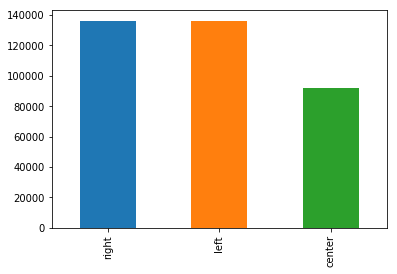

In [21]:
#lets check class distribution after downsampling
final_df['label_final'].value_counts().plot('bar')

In [24]:
final_df.to_csv("/Users/rakeshravi/Documents/Spring/Text Analytics/final_document.csv", index = False)

## 1. High Level Charts for All Three Classes

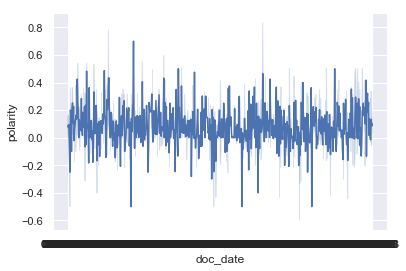

In [22]:
left = final_df[final_df["label"] == "left"].sample(1000)
sns.set(style='darkgrid')
sns.lineplot(x='doc_date', y='polarity', data=left)

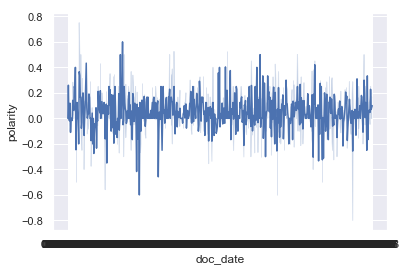

In [9]:
right = df[df["label"] == "right"].sample(1000)
sns.set(style='darkgrid')
sns.lineplot(x='doc_date', y='polarity', data=right)

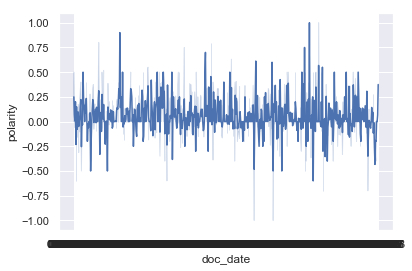

In [10]:
center = df[df["label"] == "center"].sample(1000)
sns.set(style='darkgrid')
sns.lineplot(x='doc_date', y='polarity', data=center)

## 2. Year Level

In [32]:
left = df.loc[(df["label"] == "left") | (df["label"] == "left-center") ]
left["doc_date"] = pd.to_datetime(left["doc_date"])
left['year'] = pd.DatetimeIndex(left['doc_date']).year
left['month'] = pd.DatetimeIndex(left['doc_date']).month
left_yr = pd.DataFrame(left.groupby(["year"]).agg({"polarity":"mean"}))
left_yr.reset_index(inplace=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

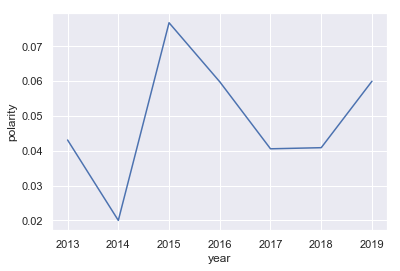

In [33]:
sns.set(style='darkgrid')
sns.lineplot(x='year', y='polarity', data=left_yr)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

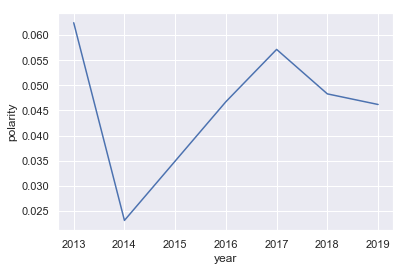

In [36]:
right = df.loc[(df["label"] == "right") | (df["label"] == "right-center") ]
right["doc_date"] = pd.to_datetime(right["doc_date"])
right['year'] = pd.DatetimeIndex(right['doc_date']).year
right['month'] = pd.DatetimeIndex(right['doc_date']).month
right_yr = pd.DataFrame(right.groupby(["year"]).agg({"polarity":"mean"}))
right_yr.reset_index(inplace=True)
sns.set(style='darkgrid')
sns.lineplot(x='year', y='polarity', data=right_yr)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

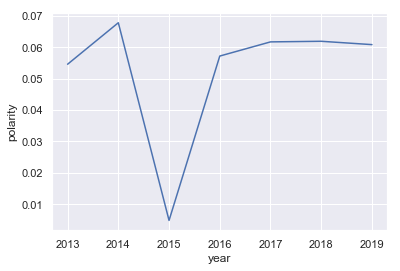

In [35]:
center = df.loc[(df["label"] == "center")]
center["doc_date"] = pd.to_datetime(center["doc_date"])
center['year'] = pd.DatetimeIndex(center['doc_date']).year
center['month'] = pd.DatetimeIndex(center['doc_date']).month
center_yr = pd.DataFrame(center.groupby(["year"]).agg({"polarity":"mean"}))
center_yr.reset_index(inplace=True)
sns.set(style='darkgrid')
sns.lineplot(x='year', y='polarity', data=center_yr)

## 3. Year & Month Plot

In [49]:
df = df.notnull()
df["doc_date"] = pd.to_datetime(df["doc_date"])
df['year'] = pd.DatetimeIndex(df['doc_date']).year
df['month'] = pd.DatetimeIndex(df['doc_date']).month
df['date'] = df['month'].map(str)+ '-' +df['year'].map(str)
df['date'] = pd.to_datetime(df['date'], format='%m-%Y').dt.strftime('%m-%Y')

TypeError: <class 'bool'> is not convertible to datetime

In [ ]:
left = df.loc[(df["label"] == "left")]
left_yr = pd.DataFrame(center.groupby(["date"]).agg({"polarity":"mean"}))
left_yr.reset_index(inplace=True)
fig, ax = plt.subplots()
plt.plot_date(df['date'], df['Value'])
plt.show()